In [1]:
#In this notebook, the focus is on providing a basic recommendation system by suggesting items that are most similar 
#to a particular item, in this case, movies. This is not a true robust recommendation system,
#to describe it more accurately,it just tells you what movies/items are most similar to your movie choice.


In [2]:
import numpy as np
import pandas as pd

In [3]:
col_names=['user_id','item_id','rating','timestamp']

In [4]:
df=pd.read_csv('u.data',sep='\t',names=col_names)

In [6]:
df.head()  #The MovieLens dataset

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [7]:
movie_titles=pd.read_csv('Movie_Id_Titles')

In [8]:
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [9]:
df=pd.merge(df,movie_titles,on='item_id') #To have a connection between item id and title

In [10]:
df.head() #Much better, now the id atleast gives the title of the movie now.

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [11]:
#Lets explore and get a feel of the data

In [12]:
import matplotlib.pyplot
import seaborn as sns
%matplotlib inline

In [13]:
sns.set_style('white')

In [14]:
#Dataframe for average rating and number of ratings

In [16]:
df.groupby('title')['rating'].mean() #I have the average of mean rating of every movie

title
'Til There Was You (1997)                2.333333
1-900 (1994)                             2.600000
101 Dalmatians (1996)                    2.908257
12 Angry Men (1957)                      4.344000
187 (1997)                               3.024390
                                           ...   
Young Guns II (1990)                     2.772727
Young Poisoner's Handbook, The (1995)    3.341463
Zeus and Roxanne (1997)                  2.166667
unknown                                  3.444444
Á köldum klaka (Cold Fever) (1994)       3.000000
Name: rating, Length: 1664, dtype: float64

In [17]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()  #Gives out the top rated movies

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [18]:
#Now its possible that only a few people saw it and gave high ratings 

In [19]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [20]:
 #So these are rated the most number of times , kinda famous

In [22]:
ratings=pd.DataFrame(df.groupby('title')['rating'].mean())

In [23]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [24]:
#BUt we saw that raitng kind of depends on how many people rated it

In [25]:
ratings['Count of Ratings']=pd.DataFrame(df.groupby('title')['rating'].count())

In [26]:
ratings.head()

,rating,Count of Ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


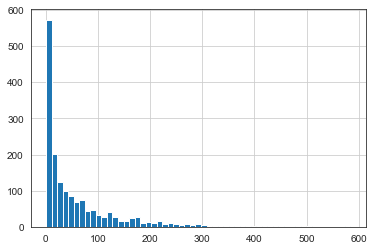

In [27]:
ratings['Count of Ratings'].hist(bins=55)  #Okay so most people dont rate

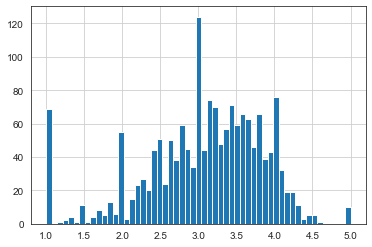

In [28]:
ratings['rating'].hist(bins=55) #Okay so ratings are maximum around 3

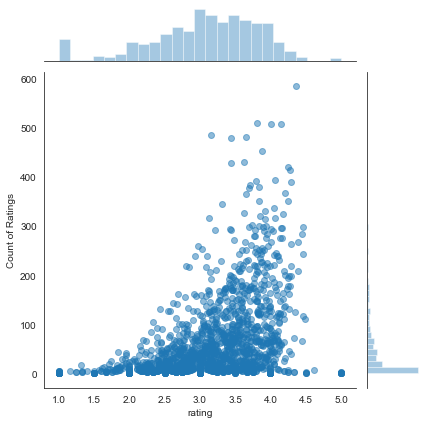

In [29]:
sns.jointplot(x='rating',y='Count of Ratings',data=ratings,alpha=0.5)

In [30]:
#So kind of signifies if we have more ratings , more likely to have a higher rating
#kinda makes sense, more people watch better movies and raters

In [31]:
#Okay so we have a basic idea about the data, Let's look at a simple recommender system
#based of item similarity

In [32]:
#Matrix for userId of one axis and movie title on other axis, each cell then contains 
#the rating the user gave to that movie

In [33]:
moviematrix=df.pivot_table(index='user_id',columns='title',values='rating')

In [34]:
moviematrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
#lot of null values make sense as most people have not seen most of the movies 

In [36]:
ratings.sort_values('Count of Ratings',ascending=False)

,rating,Count of Ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
...,...,...
"Great Day in Harlem, A (1994)",5.000000,1
"Other Voices, Other Rooms (1997)",3.000000,1
Good Morning (1971),1.000000,1


In [62]:
fargo_user_ratings=moviematrix['Fargo (1996)']
starwars_user_ratings=moviematrix['Star Wars (1977)']

In [63]:
fargo_user_ratings.head()

user_id
0    NaN
1    5.0
2    5.0
3    NaN
4    NaN
Name: Fargo (1996), dtype: float64

In [39]:
#Using corr with as a method to get a correlation between to pandas series
#Corr with will compute the pair wise correlation between rows and colums of two df objects instead 
#of just index or colums of df

In [45]:
moviematrix.corrwith(fargo_user_ratings) 
#I asking for the correlation of every other movie to that specific user behaivor 
#on the fargo movie

C:\Users\anike\anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\anike\anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


title
'Til There Was You (1997)                0.100000
1-900 (1994)                             0.866025
101 Dalmatians (1996)                   -0.245368
12 Angry Men (1957)                      0.098676
187 (1997)                               0.142509
                                           ...   
Young Guns II (1990)                    -0.018688
Young Poisoner's Handbook, The (1995)   -0.034345
Zeus and Roxanne (1997)                 -0.353553
unknown                                 -0.101768
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [64]:
similar_to_fargo=moviematrix.corrwith(fargo_user_ratings) 
similar_to_starwars=moviematrix.corrwith(starwars_user_ratings) 

C:\Users\anike\anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\anike\anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [48]:
#cleaning by removing null values
corr_fargo=pd.DataFrame(similar_to_fargo,columns=['Correlations'])
corr_fargo.dropna(inplace=True)

In [51]:
corr_fargo.head() #How correlated is the movie ratings of these movies in comparison to fargo

,Correlations
title,
'Til There Was You (1997),0.100000
1-900 (1994),0.866025
101 Dalmatians (1996),-0.245368
12 Angry Men (1957),0.098676
187 (1997),0.142509


In [55]:
#So basically if we sort it , we will get similar movies 
# However some results dont make sense
corr_fargo.sort_values('Correlations',ascending=False).head(10)

,Correlations
title,
Open Season (1996),1.0
Maya Lin: A Strong Clear Vision (1994),1.0
Captives (1994),1.0
City of Industry (1997),1.0
"Convent, The (Convento, O) (1995)",1.0
Fargo (1996),1.0
"Smile Like Yours, A (1997)",1.0
"Journey of August King, The (1995)",1.0
King of the Hill (1993),1.0


In [56]:
#Funny how smile like yours is perfectly correlated to fargo
#Probably cuz of that one rater who has rated both
#Lets fix this by filtering out movies having less than a certain number of views

In [57]:
corr_fargo=corr_fargo.join(ratings['Count of Ratings']) #joining the data frame

In [58]:
corr_fargo.head()

,Correlations,Count of Ratings
title,,
'Til There Was You (1997),0.100000,9
1-900 (1994),0.866025,5
101 Dalmatians (1996),-0.245368,109
12 Angry Men (1957),0.098676,125
187 (1997),0.142509,41


In [59]:
#Join insted of merge as i have title as the index of the data frame 

In [60]:
corr_fargo=corr_fargo[corr_fargo['Count of Ratings']>100].sort_values('Correlations',ascending=False)

In [61]:
corr_fargo.head()

,Correlations,Count of Ratings
title,,
Fargo (1996),1.000000,508
Sling Blade (1996),0.381159,136
Lone Star (1996),0.370915,187
Quiz Show (1994),0.355031,175
Lawrence of Arabia (1962),0.353408,173


In [66]:
corr_starwars=pd.DataFrame(similar_to_starwars,columns=['Correlations'])

In [67]:
corr_starwars

,Correlations
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374
Zeus and Roxanne (1997),0.818182


In [68]:
corr_starwars.dropna(inplace=True)

In [69]:
corr_starwars=corr_starwars.join(ratings['Count of Ratings'])

In [73]:
corr_starwars[corr_starwars['Count of Ratings']>150].sort_values('Correlations',ascending=False).head()

,Correlations,Count of Ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
"Sting, The (1973)",0.367538,241


In [74]:
#Similar movies to star wars
#Well we were able to filter out some similar movies
#Thank you